# Импортированные модули

In [50]:
from sympy import *

import matplotlib.pyplot as plt

from sympy.solvers.solveset import *

from sympy.plotting import *

In [51]:
q,x1,x2=symbols("q x1 x2")
alpha1,alpha2,gamma1,gamma2,gamma3=symbols("alpha1 alpha2 gamma1 gamma2 gamma3")
y=x1**alpha1*x2**alpha2*E**(gamma1*x1+gamma2*x2+gamma3*x1*x2)

In [52]:
mpx1=simplify(diff(y,x1))
mpx2=simplify(diff(y,x2))
#======================================================================
def numpx1(i,j):
    return simplify(mpx1/y).subs(x1,i).subs(x2,j)
def numpx2(i,j):
    return simplify(mpx2/y).subs(x1,i).subs(x2,j)

In [53]:
def numy(i,j):
    return y.subs(x1,i).subs(x2,j)

In [54]:
epsilon1,epsilon2=symbols("epsilon_x_1 epsilon_x_2")

e1=simplify(diff(y,x1)/(y/x1))
e2=simplify(diff(y,x2)/(y/x2))

def nume1(i,j):
    return e1.subs(x1,i).subs(x2,j)
    
def nume2(i,j):
    return e2.subs(x1,i).subs(x2,j)

In [55]:
def ycheck(gamma3sub):
    resh1=nonlinsolve([numpx1(25,50),numpx2(25,50),nume1(12,25)-1,nume2(12,25)-1],
                       [alpha1, alpha2, gamma1, gamma2, gamma3]).args[0].subs(gamma3,gamma3sub)
    d=y.subs(alpha1,resh1[0]).subs(alpha2,resh1[1]).subs(gamma1,resh1[2]).subs(gamma2,resh1[3]).subs(gamma3,resh1[4])
    return d

In [56]:
def ycheck_all(x1max,x2max,x1e1,x2e2,gamma3_zamena,get_parameters=False):
    resh2=nonlinsolve([numpx1(x1max,x2max),numpx2(x1max,x2max),
                       nume1(x1e1,x2e2)-1,nume2(x1e1,x2e2)-1],
                       [alpha1,alpha2,gamma1,gamma2,gamma3]).args[0].subs(gamma3,gamma3_zamena)
    if get_parameters==False:
        d1=y.subs(alpha1,resh2[0]).subs(alpha2,resh2[1]).subs(gamma1,resh2[2]).subs(gamma2,resh2[3]).subs(gamma3,resh2[4])
        return d1
    else:
        d2=[resh2[i] for i in range(5)]
        return d2

In [57]:
def alpha_ycheck_all(x1max,x2max,x1e1,x2e1,x1e2,x2e2,gamma3_zamena,get_parameters=False):
    resh2=nonlinsolve([numpx1(x1max,x2max),numpx2(x1max,x2max),
                       nume1(x1e1,x2e1)-1,nume2(x1e2,x2e2)-1],
                       [alpha1,alpha2,gamma1,gamma2,gamma3]).args[0].subs(gamma3,gamma3_zamena)
    if get_parameters==False:
        d1=y.subs(alpha1,resh2[0]).subs(alpha2,resh2[1]).subs(gamma1,resh2[2]).subs(gamma2,resh2[3]).subs(gamma3,resh2[4])
        return d1
    else:
        d2=[resh2[i] for i in range(5)]
        return d2

In [58]:
def all_plots(gr):
    plot3d(gr, (x1,0,100),(x2,0,100))
    %matplotlib inline
    
    
    XX=[x1,x2]
    for j in range(2):
        vr1=plot(gr.subs(XX[j],10),(XX[j-1],0,100),ylabel=f"TP({XX[j-1]})",
             title=f"Функция выпуска от {XX[j-1]}(10,20,30,40,50)",show=0)
        for i in range(20,60,10):
            pp=plot(gr.subs(XX[j],i),(XX[j-1],0,100),show=0)
            vr1.append(pp[0])
        vr1.show()
        vr2=plot(diff(gr.subs(XX[j],10),XX[j-1]),(XX[j-1],0,100),
                 title=f"MP,AP от {XX[j-1]}(10,20,30,40,50)",
                 ylabel=f"MP,AP({XX[j-1]})",show=0)
        vr3=plot(gr.subs(XX[j],10)/XX[j-1],(XX[j-1],0,100),line_color="red",show=0)
        vr2.append(vr3[0])
        for i in range(20,60,10):
            pp1=plot(diff(gr.subs(XX[j],i),XX[j-1]),(XX[j-1],0,100),show=0)
            pp2=plot(gr.subs(XX[j],i)/XX[j-1],(XX[j-1],0,100),line_color="red",show=0)
            vr2.append(pp1[0])
            vr2.append(pp2[0])
        vr2.show()

In [59]:
def mrts1(gr,rhosub=1):
    return simplify((diff(gr,x1)-diff(gr,x2)*rhosub)/gr,rational=None)

In [60]:
#Определяем класс, который заставляет класс выглядеть определенным образом
#Этот убирает 000 в конце
class nf(float):
    def __repr__(self):
        s = f'{self:.1f}'
        return f'{self:.0f}' if s[-1] == '0' else s
#====функция для получения линий уровня от производственной функции
#====gr - функция для построения линий уровня
#====доп. аргумент: x1maxx,x2maxx - значения максимумов от которых зависит пик функции
#====доп. аргумент: i, j - края графика x1 и x2
#====доп. аргумент: numlevels - число уровней
def level_lines(gr,x1maxx=30,x2maxx=50,i=100,j=100,numlevels=30, opts=False, shirina=8 ,vysota=8):
    vr1=lambdify([x1,x2],gr)
    xl = np.arange(0.1, i, 0.1)
    yl = np.arange(0.1, j, 0.1)
    xxl, yyl = np.meshgrid(xl, yl)
    zl = vr1(xxl,yyl)
    fig, ax = plt.subplots(figsize=(shirina,vysota))
    plt.xlabel(r'$x_1$',fontsize=17, fontweight='bold')
    plt.ylabel(r'$x_2$',fontsize=17, fontweight='bold')
    plt.grid()
    
    if (x1maxx==30) and (x2maxx==50):
        CS = ax.contour(xl,yl,zl,np.arange(0, 38000, 2000))
    else:
        vr2=vr1(x1maxx,x2maxx)
        CS = ax.contour(xl,yl,zl,np.arange(0, int(vr2+vr2/numlevels), int(vr2/numlevels)))
    
    CS.levels = [nf(val) for val in CS.levels]
    
    if plt.rcParams["text.usetex"]:
        fmt = r'%r'
    else:
        fmt = '%r'

    ax.clabel(CS, CS.levels,inline=True, fmt=fmt, fontsize=10)
    
    if opts==True:
        optx1=solve(mrts1(gr),x1)
        lambda_optx1=lambdify([x2],optx1[0])
        vrxxx1=np.arange(0.1,100,0.1)
        vrxxx2=lambda_optx1(vrxxx1)
        ax.plot(vrxxx2,vrxxx1,'r')
        ax.scatter(x1maxx,x2maxx,c='r',s=150,marker="*")
    
    return [ax,fig]
#ФУНКЦИЯ ВОХВРАЩАЕТ АКСИС И ФИГУРУ, ПОЭТОМУ
#МОЖНО АППЕНД ОТДЕЛЬНЫЙ САБПЛОТ
#А ТАКЖЕ ДОБАВИТЬ НОВЫЙ ГРАФИК НА СУЩЕСТВУЮЩИЙ методом [0].plot()

## Свеже импортированные модули

In [165]:
from pynverse import *
from scipy.misc import derivative
import scipy.optimize as opt

# <ins>ДОЛГОСРОЧНЫЕ ФУНКЦИИ ИЗДЕРЖЕК </ins>
*Алгоритм получения всех функций, выводимых из функции долгосрочных издержек*

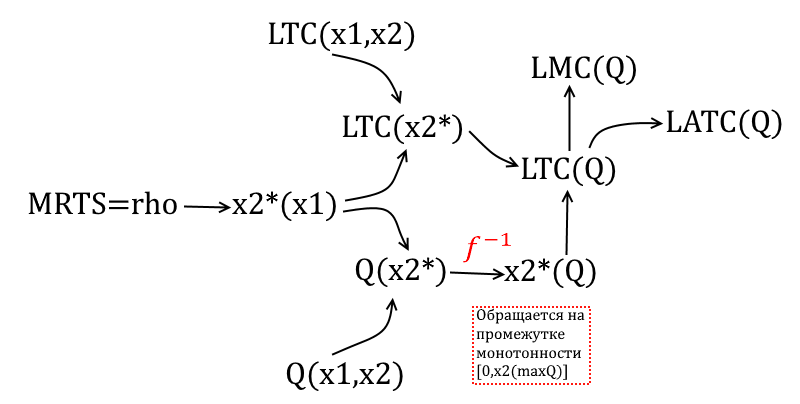

## ***Конкретная ТПФ***
***Нахождение долгосрочных издержек на примере конкретной трансцендентной производственной функции***

---------------------

### Подобранная ТПФ
[сделано]

x1**0.96*x2**0.9375*exp(-0.001*x1*x2 + 0.018*x1 + 0.01125*x2)

[<AxesSubplot:xlabel='$x_1$', ylabel='$x_2$'>,
 <Figure size 360x360 with 1 Axes>]

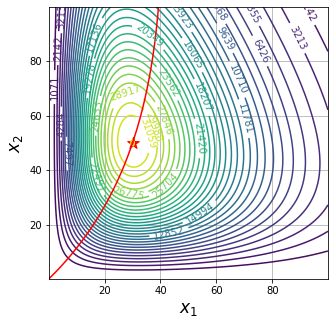

In [61]:
display(ycheck_all(30,50,5,10,-0.001))
level_lines(ycheck_all(30,50,15,25,-0.0001),30.001,50.001,opts=1,vysota=5,shirina=5)
# all_plots(ycheck_all(30,50,15,25,-0.0001))

x1**2.33333333333333*x2**3.25*exp(-0.001*x1*x2 - 0.00833333333333333*x1 - 0.025*x2)

[<AxesSubplot:xlabel='$x_1$', ylabel='$x_2$'>,
 <Figure size 360x360 with 1 Axes>]

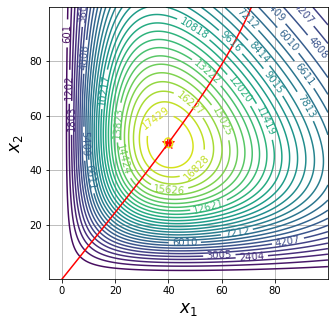

In [62]:
display(ycheck_all(40,50,25,45,-0.001))
level_lines(ycheck_all(40,50,15,25,-0.0001),40.001,50.001,opts=1,vysota=5,shirina=5)
# all_plots(ycheck_all(30,50,25,45,-0.0001))

### *LTC для конкретной ТПФ*
[сделано]

---------------------------------------

#### Получение линии оптимумов на примере конкретной ТПФ
[сделано]

In [63]:
#===Функция на пример
Ex_y=ycheck_all(30,50,10,15,-0.0001)


In [66]:
#===аналитический вывод линии оптимумов из MRTS=rho, при rho=1,где rho-отношение цен факторов
Ex_y_optx1=solve(mrts1(Ex_y),x1)

In [67]:
#проверка, какое решение подходящее
Ex_y_optx1[0].subs(x2,10),Ex_y_optx1[1].subs(x2,10)
#подходит первое

(9.20882011066777, 1571.86260846076)

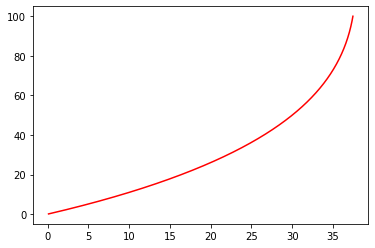

In [68]:
#==получаем лямбда-функцию из симпай-символьной функции
#==шаг должен быть достаточно мал, чтобы избежать феномен рунге
Ex_y_lambda_optx1=lambdify([x2],Ex_y_optx1[0])
Ex_y_x2=np.arange(0.1,100,0.01) #численное значение x2
Ex_y_x1=Ex_y_lambda_optx1(Ex_y_x2) #табуляция x1 по линии оптимумов
plt.plot(Ex_y_x1,Ex_y_x2,'r')

[<AxesSubplot:xlabel='$x_1$', ylabel='$x_2$'>,
 <Figure size 576x576 with 1 Axes>]

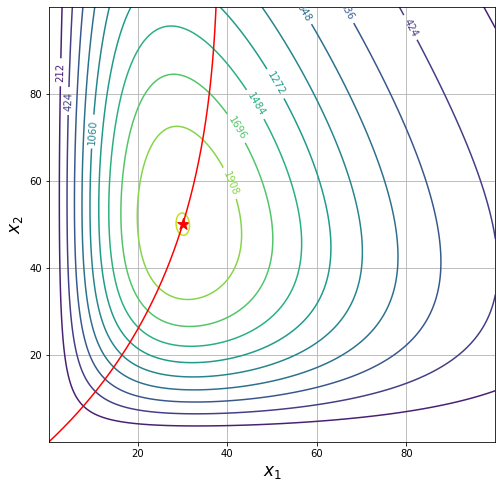

In [69]:
level_lines(Ex_y,30.01,50.01,numlevels=10,opts=1)

#### Получение фунции и графика LTC для конкретной ТПФ
[сделано]

In [71]:
#===импортируем пакет для получения обратной лямбда-функции
from pynverse import *

In [72]:
tc=10*x1+10*x2
yex2=ycheck_all(30,50,10,15,-0.0001)

In [73]:
#===мы берем Sympy функции Q и LTC
# display(Eq(LTC,10*x1+10*x2))
display(yex2)

Ex_y_optx1=solve(mrts1(yex2),x1)

x1**1.4475*x2**1.38571428571429*exp(-0.0001*x1*x2 - 0.04325*x1 - 0.0247142857142857*x2)

In [74]:
#===Заменяем один фактор линией уровня
Ex_y_tc_x2=tc.subs(x1,Ex_y_optx1[0])
Ex_y_x2=Ex_y.subs(x1,Ex_y_optx1[0])

In [75]:
Ex_y_tc_x2.subs(x2,15)

280.271671616827

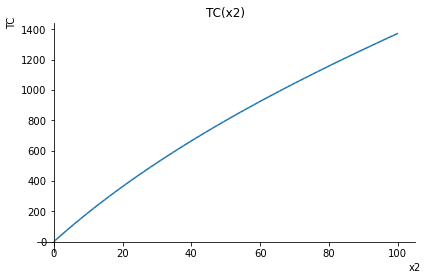

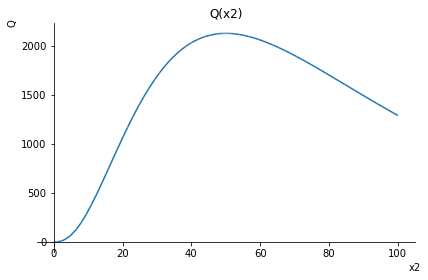

In [76]:
plot(Ex_y_tc_x2,(x2,0,100),title="TC(x2)",ylabel="TC")
plot(Ex_y_x2,(x2,0,100),title="Q(x2)",ylabel="Q")

In [77]:
#Лямбдафицируем функцию издержек и выпуска по точкам линии уровня
Ex_y_lambda_tc_x2=lambdify([x2],Ex_y_tc_x2)
Ex_y_lambda_y_x2=lambdify([x2],Ex_y_x2)

In [78]:
#проверка
print('[50]',[Ex_y_lambda_tc_x2(50),Ex_y_lambda_y_x2(50)],sep=', ')
print('[30]',[Ex_y_lambda_tc_x2(30),Ex_y_lambda_y_x2(30)],sep=', ')

[50], [800.0000000000003, 2123.806101551667]
[30], [520.9355820700837, 1686.2438591036964]


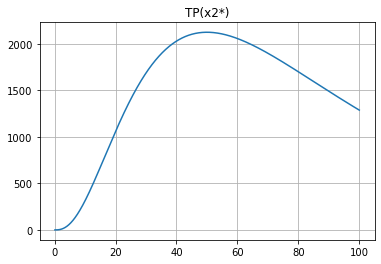

In [79]:
#проверка графика
Ex_y_y1=np.arange(0.1,100,0.01)
Ex_y_y2=Ex_y_lambda_y_x2(Ex_y_y1)
plt.plot(Ex_y_y1,Ex_y_y2)
plt.title('TP(x2*)')
plt.grid()

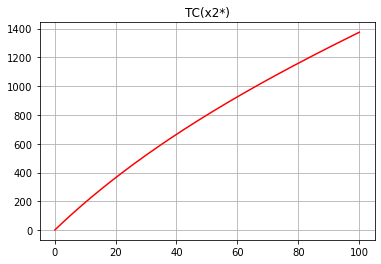

In [80]:
#проверка графика
Ex_y_z1=np.arange(0.1,100,0.01)
Ex_y_z2=Ex_y_lambda_tc_x2(Ex_y_z1)
plt.plot(Ex_y_z1,Ex_y_z2,'r')
plt.title('TC(x2*)')
plt.grid()

In [81]:
#===получаем обратные функции x2*(Q),x2*(tc)
#===дефолтно точность равна двум знакам после запятой,
#===что может стать проблемой при дифференцировании (феномен Рунге, например)
#===поэтому точность должна быть повышена
#x2=f(LTC)
Ex_y_inverse_lambda_x2_tc=inversefunc(Ex_y_lambda_tc_x2,open_domain=[True, False],domain=[0, 100])
#x2=f(Q)
Ex_y_inverse_lambda_x2_y=inversefunc(Ex_y_lambda_y_x2,open_domain=[True, False],domain=[0, 100])

In [82]:
Ex_y_lambda_tc_x2(100)

1374.5394671293213

In [83]:
Ex_y_lambda_y_x2(100)

1286.9799545257274

In [84]:
#===получаем зависимость Q(TC) и TC(Q) по линиии оптимумов
Ex_y_lambda_y_tc=lambda per: Ex_y_lambda_y_x2(Ex_y_inverse_lambda_x2_tc(per))
Ex_y_lambda_tc_y=lambda per: Ex_y_lambda_tc_x2(Ex_y_inverse_lambda_x2_y(per))

Text(0.5, 0, 'Q')

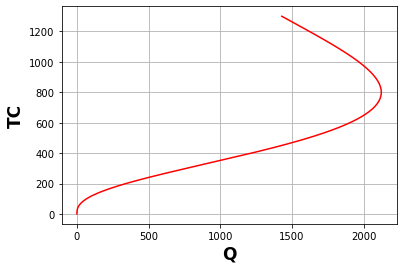

In [85]:
Ex_y_tcc1=np.arange(0.1,1300,0.1)
Ex_y_yy=Ex_y_lambda_y_tc(Ex_y_tcc1)
fig, ax = plt.subplots()
plt.grid()
ax.plot(Ex_y_yy,Ex_y_tcc1,'r')
plt.ylabel('TC',fontsize=17, fontweight='bold')
plt.xlabel('Q',fontsize=17, fontweight='bold')

[<AxesSubplot:xlabel='$x_1$', ylabel='$x_2$'>,
 <Figure size 360x360 with 1 Axes>]

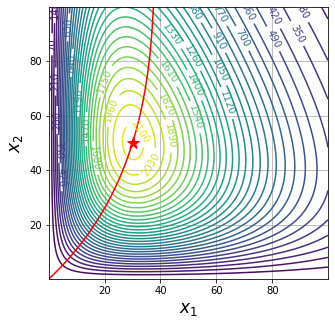

In [86]:
level_lines(yex2,30.0001,50.0001,opts=1,vysota=5,shirina=5)

## ***Генератор LTC***


---

### ***Генератор долгосрочных лямбда-функций***
[сделано]

---------------------

In [114]:
def get_lambda(gr,lambd='tc(q)'):
    optx1=solve(mrts1(gr),x1)
    lambda_optx1=lambdify([x2],optx1[0])
#======================================================================    
    if lambd=='x1(x2)':
        return lambda_optx1
#======================================================================
    if lambd=='tc(x2)':
        tc_x2=tc.subs(x1,optx1[0])
        lambda_tc_x2=lambdify([x2],tc_x2)
        return lambda_tc_x2
#======================================================================    
    if lambd=='q(x2)':
        y_x2=gr.subs(x1,optx1[0])
        lambda_y_x2=lambdify([x2],y_x2)
        return lambda_y_x2
#======================================================================        
    tc_x2=tc.subs(x1,optx1[0])    
    lambda_tc_x2=lambdify([x2],tc_x2)
#======================================================================    
    y_x2=gr.subs(x1,optx1[0])
    lambda_y_x2=lambdify([x2],y_x2)
#======================================================================    
    if lambd=='q(tc)':
        inverse_lambda_x2_tc=inversefunc(lambda_tc_x2,open_domain=[True, False],domain=[0, 100])
        lambda_y_tc=lambda per: lambda_y_x2(inverse_lambda_x2_tc(per))
        return lambda_y_tc
#======================================================================        
    if lambd=='tc(q)':
        inverse_lambda_x2_y=inversefunc(lambda_y_x2,open_domain=[True, False],domain=[0, 100])
        lambda_tc_y=lambda per: lambda_tc_x2(inverse_lambda_x2_y(per))
        return lambda_tc_y
#======================================================================    
    if lambd=='atc':
        pass
#======================================================================    
    if lambd=='mc':
        pass

Text(0, 0.5, 'Q')

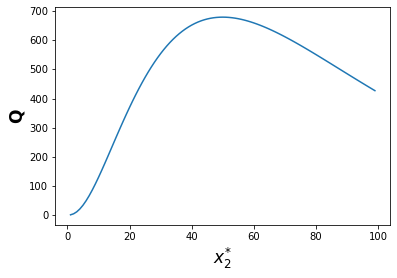

In [115]:
ggg1=np.arange(1,100,1)
ggg2=get_lambda(ygood1,lambd='q(x2)')(ggg1)
plt.plot(ggg1,ggg2)
plt.xlabel(r'$x^{*}_2$',fontsize=17, fontweight='bold')
plt.ylabel('Q',fontsize=17, fontweight='bold')

In [116]:
#===пример
yex3=ycheck_all(30,50,15,25,-0.0001)
get_lambda(yex3,'q(tc)')(500)

22245.664928879596

In [90]:
get_lambda(yex3,'x1(x2)')(np.arange(0.1,100,1))

array([ 0.09987721,  1.08532141,  2.04713489,  2.98613598,  3.90309337,
        4.79873035,  5.67372852,  6.52873116,  7.36434626,  8.18114932,
        8.97968577,  9.76047328, 10.5240038 , 11.27074539, 12.00114401,
       12.71562497, 13.41459445, 14.09844075, 14.76753548, 15.42223473,
       16.06287998, 16.68979913, 17.30330728, 17.90370757, 18.49129191,
       19.06634163, 19.62912815, 20.17991349, 20.7189509 , 21.24648529,
       21.76275373, 22.26798587, 22.76240434, 23.24622512, 23.71965791,
       24.18290643, 24.63616874, 25.0796375 , 25.51350027, 25.93793973,
       26.3531339 , 26.75925638, 27.15647656, 27.54495976, 27.92486745,
       28.29635742, 28.65958389, 29.01469769, 29.36184641, 29.70117446,
       30.03282329, 30.3569314 , 30.67363454, 30.98306573, 31.28535539,
       31.58063145, 31.86901937, 32.1506423 , 32.42562106, 32.69407431,
       32.95611851, 33.21186809, 33.4614354 , 33.70493086, 33.94246294,
       34.17413826, 34.40006161, 34.62033599, 34.83506267, 35.04

In [91]:
get_lambda(yex3,'q(tc)')(1300)

18826.636455639935

### ***Генератор графика LTC***
[сделано]

--------------------------

In [92]:
#===функция для получуния графика TC от любой ПФ
def ltc_plot(gr, allgraphs=True):
    
    display(gr)
    optx1=solve(mrts1(gr),x1)
    
    lambda_optx1=lambdify([x2],optx1[0])
    if allgraphs==True:
        vr_x2=np.arange(0.1,100,0.1) #численное значение x2
        vr_x1=lambda_optx1(vr_x2) #табуляция x1 по линии оптимумов
        plt.plot(vr_x1,vr_x2,'r')

    tc_x2=tc.subs(x1,optx1[0])
    y_x2=gr.subs(x1,optx1[0])

    if allgraphs==True:
        plot(tc_x2,(x2,0,100),title="TC(x2)",ylabel="TC")
        plot(y_x2,(x2,0,100),title="TP(x2)",ylabel="Q")

    lambda_tc_x2=lambdify([x2],tc_x2)
    lambda_y_x2=lambdify([x2],y_x2)

    inverse_lambda_x2_tc=inversefunc(lambda_tc_x2,open_domain=[True, False],domain=[0, 100])
    inverse_lambda_x2_y=inversefunc(lambda_y_x2,open_domain=[True, False],domain=[0, 100])

    lambda_y_tc=lambda per: lambda_y_x2(inverse_lambda_x2_tc(per))
    lambda_tc_y=lambda per: lambda_tc_x2(inverse_lambda_x2_y(per))

#===ГРАФИК TC
    vr_tc=np.arange(0.1,1300,0.1)
    vr_y=lambda_y_tc(vr_tc)
    fig, ax = plt.subplots()
    plt.grid()
    ax.plot(vr_y,vr_tc,'r')
    plt.ylabel('TC',fontsize=17, fontweight='bold')
    plt.xlabel('Q',fontsize=17, fontweight='bold')
    return [fig,ax]

#### Примеры функций издержек

x1**1.925*x2**1.925*exp(-0.0001*x1*x2 - 0.0591666666666667*x1 - 0.0355*x2)

[<AxesSubplot:xlabel='$x_1$', ylabel='$x_2$'>,
 <Figure size 360x360 with 1 Axes>]

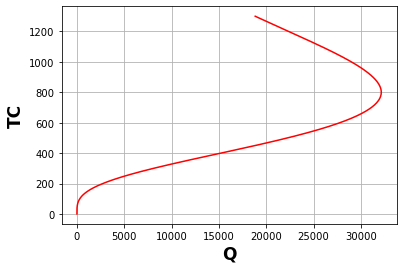

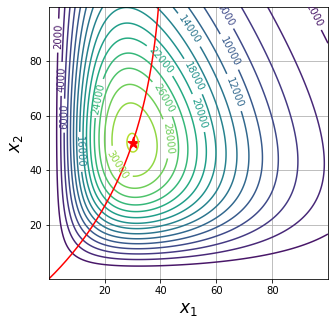

In [93]:
#===Примеры получения графиков TC
ltc_plot(ycheck_all(30,50,15,25,-0.0001),0)
level_lines(ycheck_all(30,50,15,25,-0.0001),opts=1,vysota=5,shirina=5)

[<AxesSubplot:xlabel='$x_1$', ylabel='$x_2$'>,
 <Figure size 360x360 with 1 Axes>]

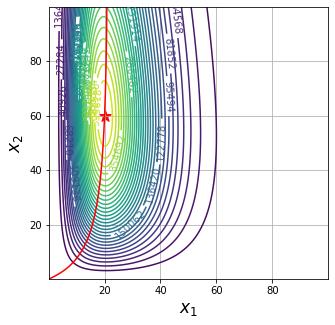

In [96]:
level_lines(ycheck_all(20,60,15,25,-0.0001),20,60,opts=1,vysota=5,shirina=5)

x1**5.25*x2**7.75*exp(-0.001*x1*x2 - 0.125*x1 - 0.125*x2)

[<AxesSubplot:xlabel='$x_1$', ylabel='$x_2$'>,
 <Figure size 360x360 with 1 Axes>]

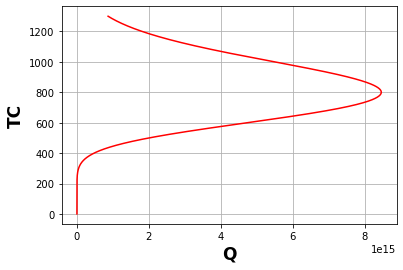

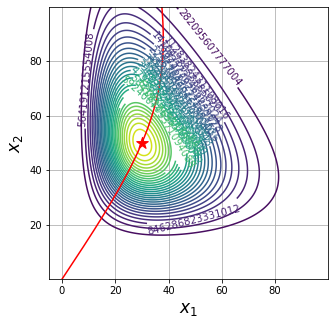

In [95]:
ltc_plot(ycheck_all(30,50,25,45,-0.001),0)
level_lines(ycheck_all(30,50,25,45,-0.001),30.0001,50.0001,opts=1,vysota=5,shirina=5)

x1**5.25*x2**7.75*exp(-0.001*x1*x2 - 0.125*x1 - 0.125*x2)

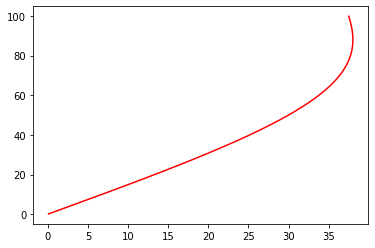

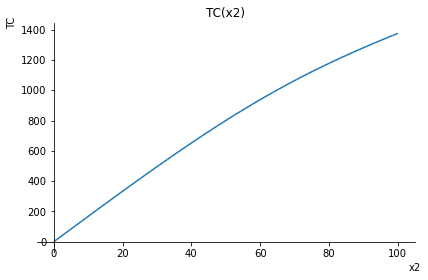

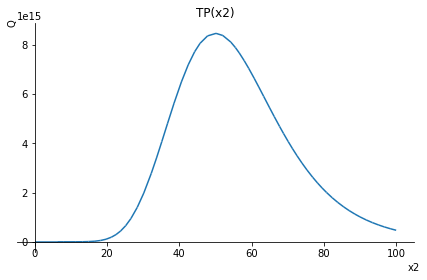

[<Figure size 432x288 with 1 Axes>, <AxesSubplot:xlabel='Q', ylabel='TC'>]

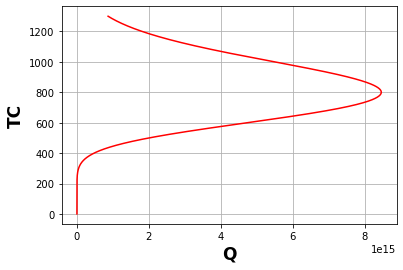

In [97]:
ltc_plot(ycheck_all(30,50,25,45,-0.001))

x1**5.25*x2**7.75*exp(-0.001*x1*x2 - 0.125*x1 - 0.125*x2)

[<AxesSubplot:xlabel='$x_1$', ylabel='$x_2$'>,
 <Figure size 360x360 with 1 Axes>]

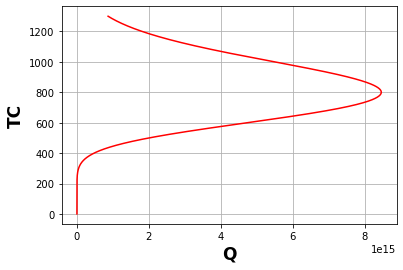

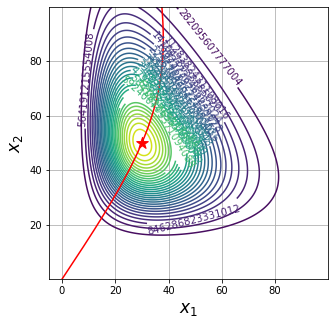

In [98]:
ltc_plot(ycheck_all(30,50,25,45,-0.001),0)
level_lines(ycheck_all(30,50,25,45,-0.001),30.0001,50.0001,opts=1,vysota=5,shirina=5)

[<AxesSubplot:xlabel='$x_1$', ylabel='$x_2$'>,
 <Figure size 360x360 with 1 Axes>]

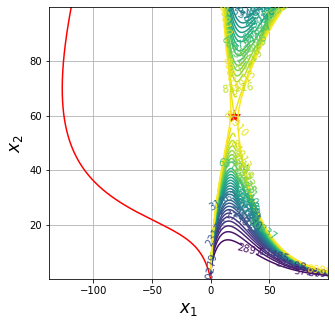

In [99]:
# ltc_plot(ycheck_all(20,60,25,45,-0.001),0)
level_lines(ycheck_all(20,60,25,45,-0.001),20.0001,60.0001,opts=1,vysota=5,shirina=5)

x1**1.4475*x2**1.38571428571429*exp(-0.0001*x1*x2 - 0.04325*x1 - 0.0247142857142857*x2)

[<AxesSubplot:xlabel='$x_1$', ylabel='$x_2$'>,
 <Figure size 360x360 with 1 Axes>]

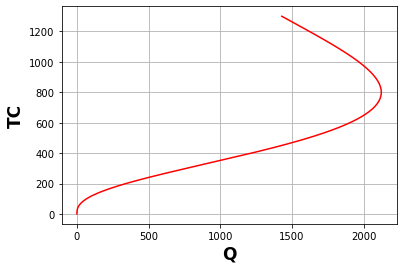

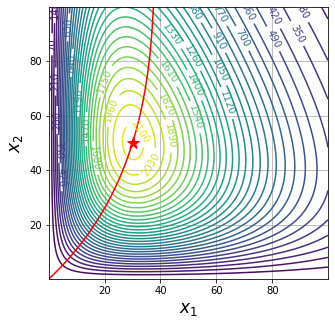

In [100]:
ltc_plot(ycheck_all(30,50,10,15,-0.0001),0)
level_lines(ycheck_all(30,50,10,15,-0.0001),30.0001,50.0001,opts=1,vysota=5,shirina=5)

x1**1.1928*x2**1.240625*exp(-3.0e-5*x1*x2 - 0.03826*x1 - 0.0239125*x2)

[<AxesSubplot:xlabel='$x_1$', ylabel='$x_2$'>,
 <Figure size 360x360 with 1 Axes>]

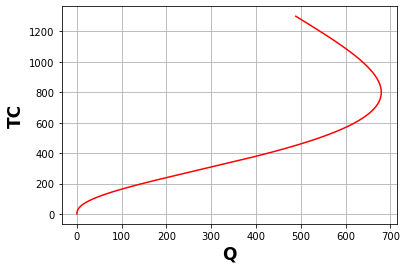

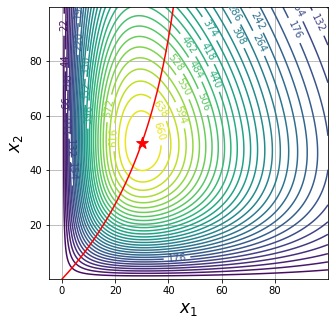

In [101]:
ltc_plot(ycheck_all(30,50,5,10,-0.00003),0)
level_lines(ycheck_all(30,50,5,10,-0.00003),30.0001,50.0001,opts=1,vysota=5,shirina=5)

x1**1.91*x2**2.33125*exp(-0.00015*x1*x2 - 0.0561666666666667*x1 - 0.042125*x2)

[<AxesSubplot:xlabel='$x_1$', ylabel='$x_2$'>,
 <Figure size 360x360 with 1 Axes>]

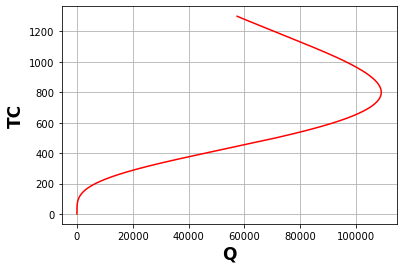

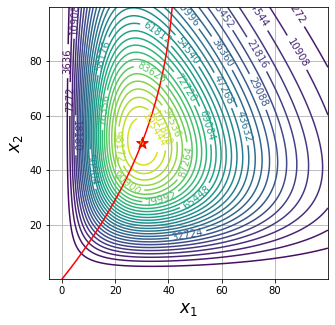

In [102]:
ltc_plot(ycheck_all(30,50,15,30,-0.00015),0)
level_lines(ycheck_all(30,50,15,30,-0.00015),30.0001,50.0001,opts=1,vysota=5,shirina=5)

## ***Генератор LATC и LMC***

------------------------------------


### ***Лямбда-функция LATC и генератор графика LATC***
[сделано]

In [117]:
def LATC(gr):
    latc1=lambda par: par/get_lambda(gr,'q(tc)')(par)
    return latc1

In [118]:
def latc_plot(gr,y_lim=100):
    vr_tc=np.arange(1,900,0.1)
    vr_latc=LATC(gr)(vr_tc)
    vr_q=get_lambda(gr,'q(tc)')(vr_tc)
    
    fig, ax = plt.subplots()
    ax.plot(vr_q,vr_latc,'g',label="LATC")
    
    ax.set_xlabel('Q',fontsize=17, fontweight='bold')
    ax.set_ylabel('LATC',fontsize=17, fontweight='bold')
    
    ax.scatter(vr_q[np.argmin(vr_latc)],np.amin(vr_latc),c='y',s=150,marker="o")
    ax.set_ylim(0,y_lim)
    plt.grid()
#     plt.xlabel('Q',fontsize=17, fontweight='bold')
#     plt.ylabel('LATC',fontsize=17, fontweight='bold')
    return [fig,ax]

x1**1.19976*x2**1.2496875*exp(-1.0e-6*x1*x2 - 0.039942*x1 - 0.02496375*x2)

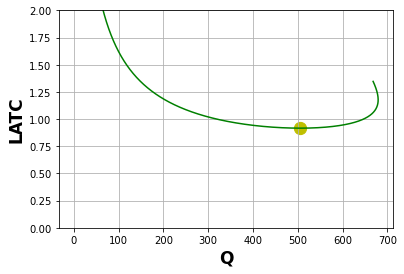

In [119]:
display(ygood1)
latc_plot(ygood1,2)[1]
ax.plot(range(100),range(100))
# ax.scatter(100,1,"r")

x1**1.925*x2**1.925*exp(-0.0001*x1*x2 - 0.0591666666666667*x1 - 0.0355*x2)

[<Figure size 432x288 with 1 Axes>, <AxesSubplot:xlabel='Q', ylabel='LATC'>]

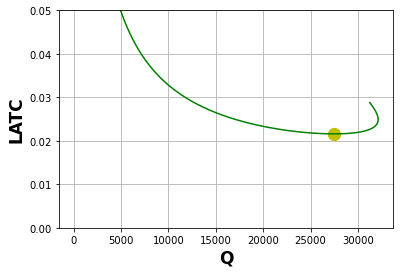

In [120]:
display(ygood2)
latc_plot(ygood2,0.05)

### ***Лямбда-функция LMC и генератор графика LMC***
[сделано]

In [121]:
from scipy.misc import derivative

In [122]:
#===первый способ получения лямбда-функции предельных издержек
def lmc1(gr):
    lambda_lmc1=lambda par:derivative(get_lambda(gr,'tc(q)'), par, dx=1e-6)
    return lambda_lmc1

C получением производной tc(q) могут быть проблемы из-за неоднозначности функции tc

In [123]:
#===
def LMC(gr):
    ftc1=inversefunc(get_lambda(gr,'q(tc)'),domain=[0, 800],open_domain=[True, False])
# ftc2=inversefunc(get_lambda(gr,'q(tc)'),domain=[800.001, 1300],open_domain=[False,False])
# lambda_lmc1=lambda per:derivative(lambda_tc_yex2, per, dx=1e-6)
    lmc2=lambda par:derivative(ftc1, par, dx=1e-6)
    return lmc2

In [124]:
def lmc_plot(gr,y_lim=100):
#     vr_tc=np.arange(1,int(get_lambda(gr,'q(tc)')(800)),int(get_lambda(gr,'q(tc)')(800)))
    vr_q=np.linspace(1,int(get_lambda(gr,'q(tc)')(800)),500)
    vr_lmc=LMC(gr)(vr_q)
#     vr_q=get_lambda(gr,'q(tc)')(vr_tc)
    
    fig, ax = plt.subplots()
    ax.plot(vr_q,vr_lmc,'r',label="LMC")
    
    ax.set_xlabel('Q',fontsize=17, fontweight='bold')
    ax.set_ylabel('LMC',fontsize=17, fontweight='bold')
    
    ax.set_ylim(0,y_lim)
    
    ax.scatter(vr_q[np.argmin(vr_lmc)],np.amin(vr_lmc),c='y',s=150,marker="o")
#     print(np.amin(vr_lmc),vr_q[np.argmin(vr_lmc)])
    plt.grid()
#     plt.xlabel('Q',fontsize=17, fontweight='bold')
#     plt.ylabel('LATC',fontsize=17, fontweight='bold')
    return [fig,ax]

[<Figure size 432x288 with 1 Axes>, <AxesSubplot:xlabel='Q', ylabel='LMC'>]

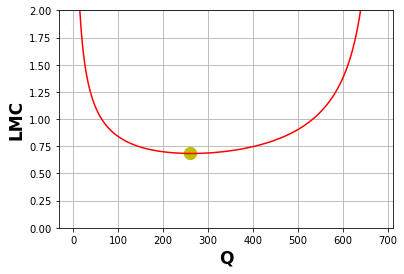

In [125]:
#пример
lmc_plot(ygood1,2)

[<Figure size 432x288 with 1 Axes>, <AxesSubplot:xlabel='Q', ylabel='LMC'>]

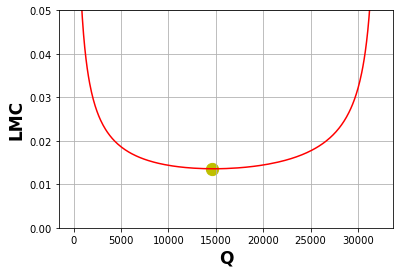

In [126]:
#пример
lmc_plot(ygood2,0.05)

### ***Объединение графиков LATC и LMC***

In [127]:
#===функция для получения графиков LATC и LMC
def latc_lmc_plot(gr,y_lim=100):
    vr_tc=np.arange(1,900,0.1)
    vr_latc=LATC(gr)(vr_tc)
    vr_q=get_lambda(gr,'q(tc)')(vr_tc)
    
    fig, ax = plt.subplots()
    ax.plot(vr_q,vr_latc,'g',label="LATC")
    
    ax.set_xlabel('Q',fontsize=17, fontweight='bold')
    ax.set_ylabel('LATC, LMC',fontsize=17, fontweight='bold')
    
    ax.scatter(vr_q[np.argmin(vr_latc)],np.amin(vr_latc),c='y',s=150,marker="o")
    ax.set_ylim(0,y_lim)
    plt.grid()

    vr_q=np.linspace(1,int(get_lambda(gr,'q(tc)')(800)),500)
    vr_lmc=LMC(gr)(vr_q)
    
    ax.plot(vr_q,vr_lmc,'r',label="LMC")
    ax.set_ylim(0,y_lim)
    ax.scatter(vr_q[np.argmin(vr_lmc)],np.amin(vr_lmc),c='y',s=150,marker="o")
    ax.legend()
    
    return [fig,ax]

[<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Q', ylabel='LATC, LMC'>]

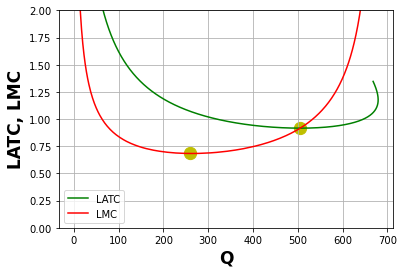

In [128]:
#пример
latc_lmc_plot(ygood1,y_lim=2)

[<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Q', ylabel='LATC, LMC'>]

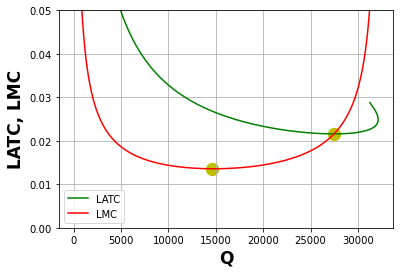

In [129]:
#пример
latc_lmc_plot(ygood2,y_lim=0.05)

# Две "хорошие" ТПФ

x1**1.19976*x2**1.2496875*exp(-1.0e-6*x1*x2 - 0.039942*x1 - 0.02496375*x2)

[<AxesSubplot:xlabel='$x_1$', ylabel='$x_2$'>,
 <Figure size 360x360 with 1 Axes>]

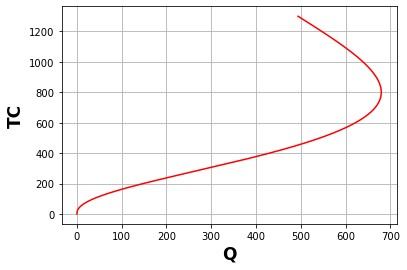

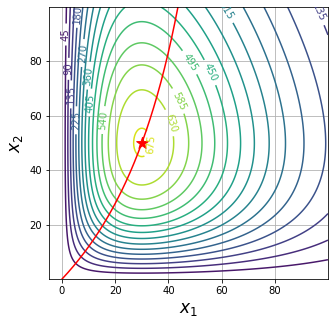

In [103]:
ygood1=ycheck_all(30,50,5,10,-0.000001)
ltc_plot(ygood1,0)
# display(ygood1)
level_lines(ygood1,30.01,50.01,opts=1,vysota=5,shirina=5,numlevels=15)

x1**1.925*x2**1.925*exp(-0.0001*x1*x2 - 0.0591666666666667*x1 - 0.0355*x2)

[<AxesSubplot:xlabel='$x_1$', ylabel='$x_2$'>,
 <Figure size 360x360 with 1 Axes>]

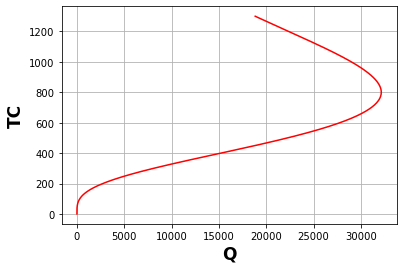

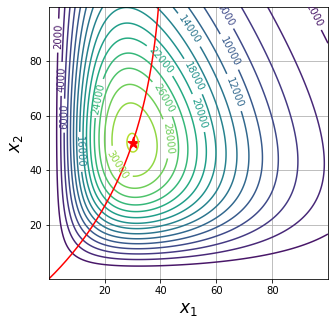

In [104]:
ygood2=ycheck_all(30,50,15,25,-0.0001)
ltc_plot(ygood2,0)
level_lines(ygood2,opts=1,vysota=5,shirina=5)

# <ins>КРАТКОСРОЧНЫЕ ФУНКЦИИ ИЗДЕРЖЕК </ins>
Алгоритм получения всех функций, выводимых из функции краткосрочных издержек

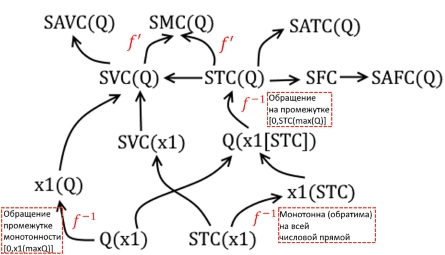

## Конкретная ТПФ

*Использую для проверки метода на конкретных функциях ygood1 и ygood2*

In [133]:
tc=10*x1+10*x2
tc

10*x1 + 10*x2

In [ ]:
#=========================Q(X1,X2)======================================
def lambda_y(gr):
    vr=lambdify([x1,x2],gr)
    return vr

lambda_tc=lambdify([x1,x2],tc)

In [543]:
#пример
lambda_y(ygood1)(10,10),lambda_tc(10,10)

(147.06928460315476, 200)

In [544]:
#=========================STC(X2)======================================
def lambda_sy_fixed_x1(gr,fixed_x1):
    vrsyx1=lambda paramx2:lambda_y(gr)(fixed_x1,paramx2)
    return vrsyx1

In [642]:
#проверка правильности работы лямбда-функции
lambda_sy_fixed_x1(ygood1,10)(60)

395.97683468471485

In [646]:
def lambda_sy_fixed_x2(gr,fixed_x2):
    vrsyx2=lambda paramx1:lambda_y(gr)(paramx1,fixed_x2)
    return vrsyx2

In [649]:
#проверка правильности работы
lambda_sy_fixed_x2(ygood1,70)(70)

350.0806475107147

In [651]:
#===фиксируем x1
def lambda_stc_fixed_x1(fixed_x1):
    vrstcx1=lambda paramx2:lambda_tc(fixed_x1,paramx2)
    return vrstcx1

In [654]:
#проверка правильности работы
lambda_stc_fixed_x1(20)(20)

400

In [656]:
def lambda_stc_fixed_x2(fixed_x2):
    vrstcx2=lambda paramx1:lambda_tc(paramx1,fixed_x2)
    return vrstcx2

In [658]:
#проверка правильности работы
lambda_stc_fixed_x2(30)(20)

500

## Обращение функций
*Если функция **y=f(x)** определена и непрерывна на числовом промежутке, то для обратимости функции необходимо и достаточно, чтобы **f(x)** была строго монотонна. Причем, если **y=f(x)** возрастает на промежутке, то и обратная к ней функция также возрастает на этом промежутке; если **y=f(x)** убывает, то и обратная функция убывает.*

In [701]:
lambda_sy_fixed_x2(ygood,10)(100)

63.92901267036649

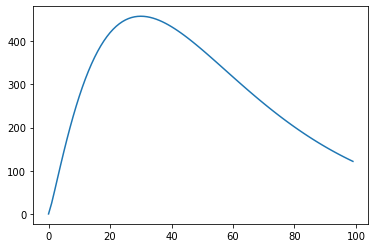

In [692]:
ooo1=np.arange(0,100,1)
ooo2=lambda_sy_fixed_x2(ygood1,20)(ooo1)
plt.plot(ooo1,ooo2)

*Функция монотонно возрастает до 50.04004208748695, а затем монотонно убывает*

In [142]:
#===Функция для обращения значений функций в минус.
#===Аргумент изначальной функции уже принимается самой NEGATIVIZE
#===Нужна для получения максимумов лямбда-функций
def negativize(fff):
    return lambda par: -fff(par)

In [703]:
#===пример использования
opt.minimize_scalar(negativize(lambda_sy_fixed_x2(ygood1,10)),(1,100))

     fun: -247.13518127874053
    nfev: 16
     nit: 12
 success: True
       x: 30.030035794166366

## Точки максимумов краткосрочных функций выпуска Q(X1) и Q(X2)
*Чтобы обратить функцию она должна быть монотонной, и я должен получить промежуток монотонности*

In [140]:
import scipy.optimize as opt

In [128]:
ygood1

x1**1.19976*x2**1.2496875*exp(-1.0e-6*x1*x2 - 0.039942*x1 - 0.02496375*x2)

Text(0.5, 0, '$x_2 (fixed)$')

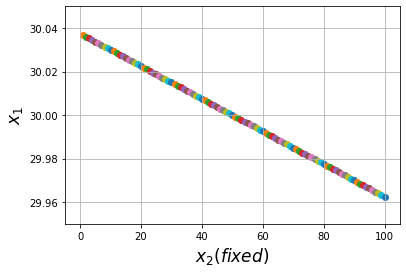

In [308]:
#посмотрим как выглядят максмимумы для различных фиксироваванных x2
for i in range(101):
    ooptvr=opt.minimize_scalar(negativize(lambda_sy_x1_fixed_x2(ygood1,i)),(1,100))
    plt.scatter(i,ooptvr.x)
plt.ylim(29.95,30.05)
plt.grid()
plt.ylabel(r"$x_1$",fontsize=17, fontweight='bold')
plt.xlabel(r"$x_2 (fixed)$",fontsize=17, fontweight='bold')
#видно, что точка максимума 

[<AxesSubplot:xlabel='$x_1$', ylabel='$x_2$'>,
 <Figure size 360x360 with 1 Axes>]

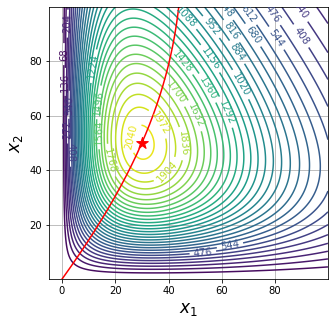

In [134]:
level_lines(alpha_ycheck_all(30,50,5,10,10,20,-0.0001),30.001,50.001,opts=1,vysota=5,shirina=5)

In [137]:
ygood3mb=alpha_ycheck_all(30,50,24,20,10,5,-0.00012)
display(ygood3mb)

x1**4.568*x2**1.09777777777778*exp(-0.00012*x1*x2 - 0.146266666666667*x1 - 0.0183555555555556*x2)

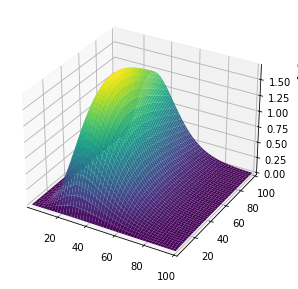

In [138]:
%matplotlib inline
plot3d(ygood3mb,(x1,0.1,100),(x2,0.1,100))

[<AxesSubplot:xlabel='$x_1$', ylabel='$x_2$'>,
 <Figure size 360x360 with 1 Axes>]

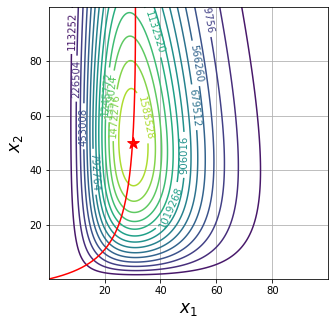

In [140]:
level_lines(ygood3mb,30.01,50.01,opts=1,vysota=5,shirina=5,numlevels=15)

[<AxesSubplot:xlabel='$x_1$', ylabel='$x_2$'>,
 <Figure size 360x360 with 1 Axes>]

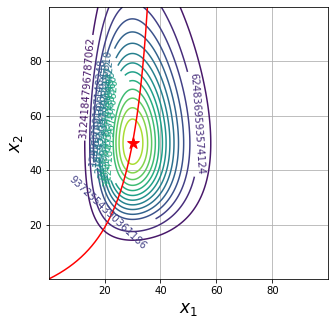

In [143]:
level_lines(alpha_ycheck_all(30,50,27,10,40,40,-0.00001),30.001,50.001,vysota=5,shirina=5,numlevels=15,opts=1)

Text(0.5, 0, '$x_2 (fixed)$')

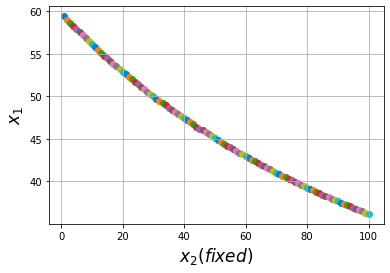

In [311]:
for i in range(1,101):
    ooptvr=opt.minimize_scalar(negativize(lambda_sy_x2_fixed_x1(ygood3mb,i)),(1,100))
    plt.scatter(i,ooptvr.x)
# plt.ylim(29.95,30.05)
plt.grid()
plt.ylabel(r"$x_1$",fontsize=17, fontweight='bold')
plt.xlabel(r"$x_2 (fixed)$",fontsize=17, fontweight='bold')
#видно, что точка максимума 

Text(0.5, 0, '$x_1 (fixed)$')

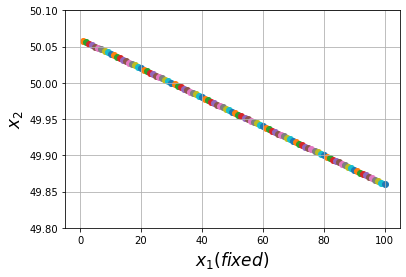

In [148]:
for i in range(101):
    ooptvr=opt.minimize_scalar(negativize(lambda_sy_x2_fixed_x1(ygood1,i)),(1,100))
    plt.scatter(i, ooptvr.x)
plt.ylim(49.8,50.1)
plt.grid()
plt.ylabel(r"$x_2$",fontsize=17, fontweight='bold')
plt.xlabel(r"$x_1 (fixed)$",fontsize=17, fontweight='bold')

## ***Генератор STC***

### Краткосрочные лямбда-функции по отдельности

In [147]:
#===способ получения SMC:
#===необходимо получить STC(Q)(X1 FIXED) и STC(Q)(X2 FIXED)
#===По аналогии с долгосрочным случаем STC должна быть ограничена по q
#===ограничение по q - это крайняя точка STC(Q) или максимум Q(STC)
#===мы должны инвертировать Q(STC) ПО ОГРАНИЧЕНИЮ, ЧТОБЫ ПОЛУЧИТЬ STC(Q) ОГРАНИЧЕННЫЙ ПО ПЕРЕМЕНЕНОЙ
#===А ЗАТЕМ УЖЕ ВЗЯЬТЬ ПРОИЗВОДНУЮ ПОЛУЧЕННОЙ STC(Q)

In [388]:
def lambda_y(gr):
    vr=lambdify([x1,x2],gr)
    return vr
#======================================================================
lambda_tc=lambdify([x1,x2],tc)

#======================================================================
#lambda+(функция)+(аргумент)+(аргумент аргумента)+(фиксированный фактор)
#=========================STC(X2)======================================
def lambda_stc_x2_fixed_x1(fixed_x1):
    vrstcx1=lambda paramx2:lambda_tc(fixed_x1,paramx2)
    return vrstcx1
#=========================STC(X1)======================================
def lambda_stc_x1_fixed_x2(fixed_x2):
    vrstcx2=lambda paramx1:lambda_tc(paramx1,fixed_x2)
    return vrstcx2
#=========================X2(STC)======================================
def lambda_x2_stc_fixed_x1(fixed_x1):
    vrx2=inversefunc(lambda_stc_x2_fixed_x1(fixed_x1))
    return vrx2
#=========================X1(STC)======================================
def lambda_x1_stc_fixed_x2(fixed_x2):
    vrx1=inversefunc(lambda_stc_x1_fixed_x2(fixed_x2))
    return vrx1
#=========================Q(X2)========================================
def lambda_sy_x2_fixed_x1(gr,fixed_x1):
    vrsyx1=lambda paramx2:lambda_y(gr)(fixed_x1,paramx2)
    return vrsyx1
#=========================Q(X1)========================================
def lambda_sy_x1_fixed_x2(gr,fixed_x2):
    vrsyx2=lambda paramx1:lambda_y(gr)(paramx1,fixed_x2)
    return vrsyx2
#=========================Q(X2(STC))===================================
def lambda_sy_x2_stc_fixed_x1(gr,fixed_x1):
    vrsyx1=lambda per:lambda_sy_x2_fixed_x1(gr,fixed_x1)(lambda_x2_stc_fixed_x1(fixed_x1)(per))
    return vrsyx1
#=========================Q(X1(STC))===================================
def lambda_sy_x1_stc_fixed_x2(gr,fixed_x2):
    vrsyx2=lambda per:lambda_sy_x1_fixed_x2(gr,fixed_x2)(lambda_x1_stc_fixed_x2(fixed_x2)(per))
    return vrsyx2
#=========================STC(Q(X1))===================================
# def lambda_stc_x1_
#=========================STC(Q(X2))===================================


### Генератор краткосрочных лямбда-функций

In [149]:
#===генератор лямбда-функций ТПФ
def get_s_lambda(gr,lambd,fixed_x=10):
#======================================================================    
    if lambd=='q(x1,x2)':
        return lambda_y(gr)
#====================================================================== 
    if lambd=='stc(x1,x2)':
        return lambda_tc
#======================================================================                 
    if lambd=='stc(x1)':
        return lambda_stc_x1_fixed_x2(fixed_x)
#======================================================================     
    if lambd=='stc(x2)':
        return lambda_stc_x2_fixed_x1(fixed_x)  
#====================================================================== 
    if lambd=='q(x1)':
        return lambda_sy_x1_fixed_x2(gr,fixed_x)
#======================================================================     
    if lambd=='q(x2)':
        return lambda_sy_x2_fixed_x1(gr,fixed_x)
#======================================================================        
#======================================================================
    if lambd=='x2(stc)':
        return lambda_x2_stc_fixed_x1(fixed_x)
#======================================================================    
    if lambd=='x1(stc)':
        return lambda_x2_stc_fixed_x1(fixed_x)
#======================================================================
    if lambd=='q(x1(stc))':
        return lambda_sy_x1_stc_fixed_x2(gr,fixed_x)
#======================================================================        
    if lambd=='q(x2(stc))':
        return lambda_sy_x2_stc_fixed_x1(gr,fixed_x)
#======================================================================        
    if lambd=='stc(q(x1))':
        pass
#======================================================================        
    if lambd=='stc(q(x2))':
        pass
#======================================================================        


### Проверка правильности работы алгоритма

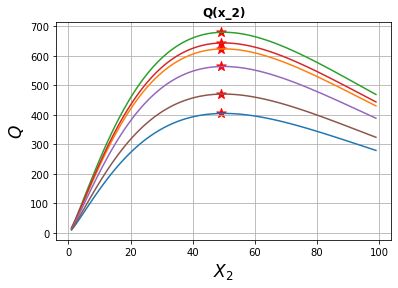

In [150]:
ggg1=np.arange(1,100,1)
for i in range(10,70,10):
    ggg2=lambda_sy_x2_fixed_x1(ygood1,i)(ggg1)
    plt.scatter(np.argmax(ggg2),np.amax(ggg2),c='r',s=100,marker="*")
    plt.plot(ggg1,ggg2)
plt.xlabel(r'$X_2$',fontsize=17, fontweight='bold')
plt.ylabel(r'$Q$',fontsize=17, fontweight='bold')
plt.title(r'Q(x_2)', fontweight='bold')
plt.grid()

<string>:2: RuntimeWarning: invalid value encountered in power
<string>:2: RuntimeWarning: invalid value encountered in power
<string>:2: RuntimeWarning: invalid value encountered in power
<string>:2: RuntimeWarning: invalid value encountered in power
<string>:2: RuntimeWarning: invalid value encountered in power
<string>:2: RuntimeWarning: invalid value encountered in power


Text(0.5, 1.0, 'Q(x2(STC))')

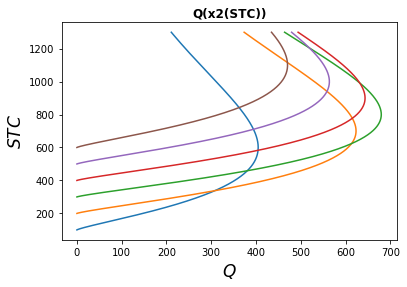

In [155]:
ggg1=np.arange(1,1300,1)
for i in range(10,70,10):
    ggg2=lambda_sy_x2_stc_fixed_x1(ygood1,i)(ggg1)
    plt.plot(ggg2,ggg1)
plt.ylabel(r'$STC$',fontsize=17, fontweight='bold')
plt.xlabel(r'$Q$',fontsize=17, fontweight='bold')
plt.title(r'Q(x2(STC))', fontweight='bold')

***Обращение STC и подстановка значений фактора проблематично, т.к. 0 значение STC может лишь получено отрицательным значением фактора, что не возможно***

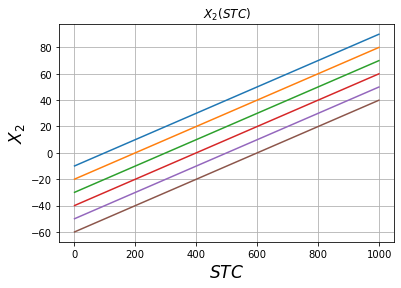

In [156]:
#===ошибка RuntimeWarning: invalid value encountered in power
#===берет свое начало отсюда. отрицательные издержки
ggg1=np.arange(1,1000,1)
for i in range(10,70,10):
    ggg2=lambda_x2_stc_fixed_x1(i)(ggg1)
    plt.plot(ggg1,ggg2)
plt.xlabel(r'$STC$',fontsize=17, fontweight='bold')
plt.ylabel(r'$X_2$',fontsize=17, fontweight='bold')
plt.title(r'$X_2 (STC)$', fontweight='bold')
plt.grid()

In [163]:
#===здесь я модифицирую обратные функции так, чтобы те не уходили в минус

#=========================X2(STC)======================================
def lambda_x2_stc_fixed_x1(fixed_x1):
    vrx2=inversefunc(lambda_stc_x2_fixed_x1(fixed_x1),domain=[0,200],open_domain=[True,False])
    return vrx2
#=========================X1(STC)======================================
def lambda_x1_stc_fixed_x2(fixed_x2):
    vrx1=inversefunc(lambda_stc_x1_fixed_x2(fixed_x2),domain=[0,200],open_domain=[True,False])
    return vrx1

#===но этот метод хуже использования SVC для получения SMC

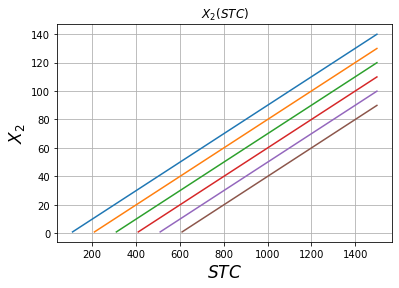

In [160]:
#===ошибка RuntimeWarning: invalid value encountered in power
#===берет свое начало отсюда. отрицательные издержки
# ggg1=np.arange(1,1000,1)
for i in range(10,70,10):
    ggg1=np.arange(lambda_stc_x2_fixed_x1(i)(1),1500,1)
    ggg2=lambda_x2_stc_fixed_x1(i)(ggg1)
    plt.plot(ggg1,ggg2)
plt.xlabel(r'$STC$',fontsize=17, fontweight='bold')
plt.ylabel(r'$X_2$',fontsize=17, fontweight='bold')
plt.title(r'$X_2 (STC)$', fontweight='bold')
plt.grid()

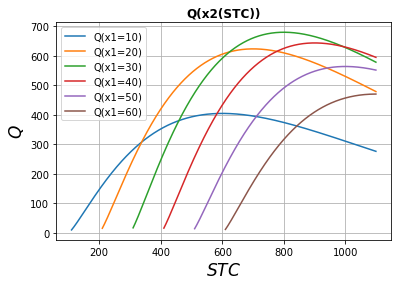

In [161]:
#===здесь вылезает ошибка возведения отрицательного числа в степень
#так решает проблема ошибки, вызванная отрицательными значениями
# ggg1=np.arange(1,1300,1)
for i in range(10,70,10):
    ggg1=np.arange(lambda_stc_x2_fixed_x1(i)(1),1100,1)
    ggg2=lambda_sy_x2_stc_fixed_x1(ygood1,i)(ggg1)
    plt.plot(ggg1,ggg2,label=f'Q(x1={i})')
plt.xlabel(r'$STC$',fontsize=17, fontweight='bold')
plt.ylabel(r'$Q$',fontsize=17, fontweight='bold')
plt.title('Q(x2(STC))', fontweight='bold')
plt.legend()
plt.grid()

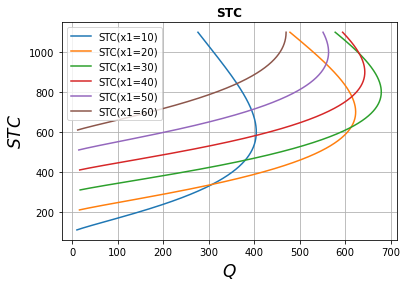

In [162]:
for i in range(10,70,10):
    ggg1=np.arange(lambda_stc_x2_fixed_x1(i)(1),1100,1)
    ggg2=lambda_sy_x2_stc_fixed_x1(ygood1,i)(ggg1)
    plt.plot(ggg2,ggg1,label=f'STC(x1={i})')
plt.ylabel(r'$STC$',fontsize=17, fontweight='bold')
plt.xlabel(r'$Q$',fontsize=17, fontweight='bold')
plt.title('STC', fontweight='bold')
plt.legend()
plt.grid()

## ***Генератор SVC***

In [167]:
import scipy.optimize as opt

In [170]:
#===Функция для обращения значений функций в минус.
#===Аргумент изначальной функции уже принимается самой NEGATIVIZE
#===Нужна для получения максимумов лямбда-функций
def negativize(fff):
    return lambda par: -fff(par)

In [ ]:
#===Проблема с получением хорошей производной от STC может быть решена следующим образом:
#===#производная переменных издержек равна производной полных издержек
#===поэтому мы можем получить обратную SVC, у которой нет проблем с отрицательными значениями
#===а затем получить SMC как производную SVC

In [217]:
#=====================SVC(X1)==========================================
def lambda_svc_x1_fixed_x2(fixed_x2):
    svcx1=lambda per: lambda_tc(per,0)
    return svcx1
#=====================SVC(X2)==========================================
def lambda_svc_x2_fixed_x1(fixed_x1):
    svcx1=lambda per: lambda_tc(0,per)
    return svcx1
#=========================Q(X2)========================================
def lambda_sy_x2_fixed_x1(gr,fixed_x1):
    vrsyx1=lambda paramx2:lambda_y(gr)(fixed_x1,paramx2)
    return vrsyx1
#=========================Q(X1)========================================
def lambda_sy_x1_fixed_x2(gr,fixed_x2):
    vrsyx2=lambda paramx1:lambda_y(gr)(paramx1,fixed_x2)
    return vrsyx2
#=========================X2(Q)========================================
def lambda_x2_sy_fixed_x1(gr,fixed_x1):
    vrx2sy=inversefunc(lambda_sy_x2_fixed_x1(gr,fixed_x1),domain=[0,
                                                          int(opt.minimize_scalar(negativize(lambda_sy_x2_fixed_x1(gr,fixed_x1)),(1,100)).x)])
    return vrx2sy
#=========================X1(Q)========================================
def lambda_x1_sy_fixed_x2(gr,fixed_x2):
    vrx1sy=inversefunc(lambda_sy_x1_fixed_x2(gr,fixed_x2),domain=[0,
                                                          int(opt.minimize_scalar(negativize(lambda_sy_x1_fixed_x2(gr,fixed_x2)),(1,100)).x)])
    return vrx1sy
#=====================SVC(X1(Q))=======================================
def lambda_svc_x1_sy_fixed_x2(gr,fixed_x2):
    svcx1sy=lambda per:lambda_svc_x1_fixed_x2(fixed_x2)(lambda_x1_sy_fixed_x2(gr,fixed_x2)(per))
    return svcx1sy
#=====================SVC(X2(Q)========================================
def lambda_svc_x2_sy_fixed_x1(gr,fixed_x1):
    svcx2sy=lambda per:lambda_svc_x2_fixed_x1(fixed_x1)(lambda_x2_sy_fixed_x1(gr,fixed_x1)(per))
    return svcx2sy

***Заметим, что Q(x1) и Q(x2) обращаются на промежутке монотонности от 0 до максимума функции***

### Проверка правильности работы лямбда-функций

Text(0, 0.5, '$STP$')

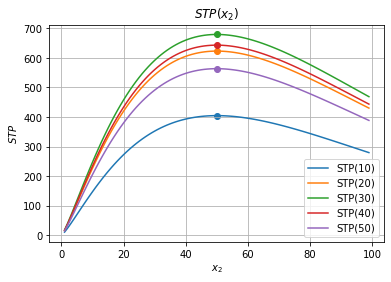

In [281]:
ggg1=np.arange(1,100,1)
for i in range(10,60,10):
    ggg2=lambda_sy_x2_fixed_x1(ygood1,i)(ggg1)
    plt.plot(ggg1,ggg2,label=f'STP({i})')
    plt.scatter(opt.minimize_scalar(negativize(lambda_sy_x2_fixed_x1(ygood1,i)),(1,100)).x,
                -opt.minimize_scalar(negativize(lambda_sy_x2_fixed_x1(ygood1,i)),(1,100)).fun)
plt.grid()
plt.legend()
plt.title(r'$STP(x_2)$')
plt.xlabel(r'$x_2$',fontweight='bold')
plt.ylabel(r'$STP$',fontweight='bold')

Text(0.5, 1.0, 'x2(Q)')

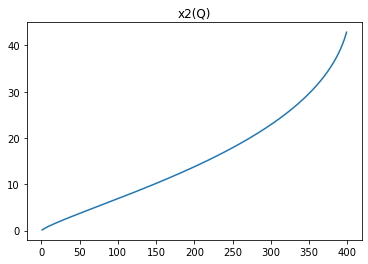

In [282]:
ggg1=np.arange(1,400,1)
ggg2=lambda_x2_sy_fixed_x1(ygood1,10)(ggg1)
plt.plot(ggg1,ggg2)
plt.title('x2(Q)')

(0.0, 500.0)

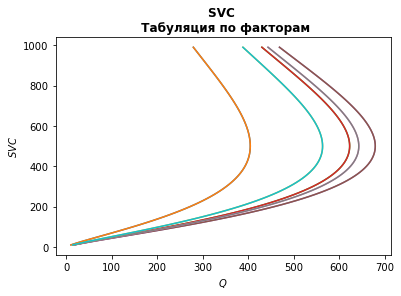

In [440]:
for i in range(10,60,10):
    ggg1=np.arange(1,100,1)
    ggg2=lambda_svc_x2_fixed_x1(i)(ggg1)
    ggg3=lambda_sy_x2_fixed_x1(ygood1,i)(ggg1)
    plt.plot(ggg3,ggg2)
    plt.plot(ggg3,ggg2)
plt.title('SVC \n Табуляция по факторам',fontweight='bold')
# plt.grid()
plt.xlabel(r'$Q$')
plt.ylabel(r'$SVC$')
ax1.set_ylim(0,500)

Text(0, 0.5, '$SVC$')

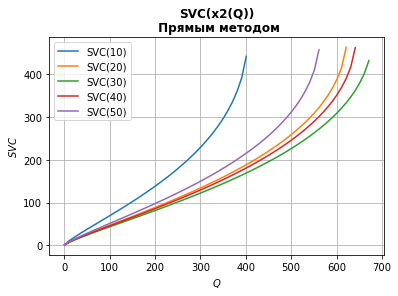

In [283]:
for i in range(10,60,10):
    ggg1=np.arange(1,int(-(opt.minimize(negativize(lambda_sy_x2_fixed_x1(ygood1,i)),0).fun)),10)
    ggg2=lambda_svc_x2_sy_fixed_x1(ygood1,i)(ggg1)
    plt.plot(ggg1,ggg2,label=f'SVC({i})')
plt.title('SVC(x2(Q))\n Прямым методом',fontweight='bold')
plt.legend()
plt.grid()
plt.xlabel(r'$Q$',fontweight='bold')
plt.ylabel(r'$SVC$',fontweight='bold')
# lambda_svc_x2_sy_fixed_x1

Text(0, 0.5, '$SVC$')

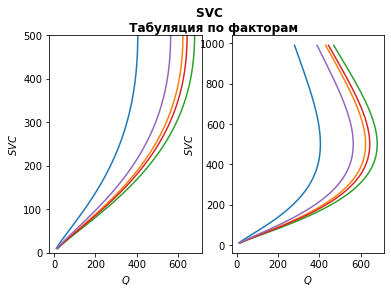

In [438]:
fig, (ax1, ax2)=plt.subplots(1,2)
for i in range(10,60,10):
    ggg1=np.arange(1,100,1)
    ggg2=lambda_svc_x2_fixed_x1(i)(ggg1)
    ggg3=lambda_sy_x2_fixed_x1(ygood1,i)(ggg1)
    ax1.plot(ggg3,ggg2)
    ax2.plot(ggg3,ggg2)
fig.suptitle('SVC \n Табуляция по факторам',fontweight='bold')
# plt.grid()
ax1.set_xlabel(r'$Q$')
ax1.set_ylabel(r'$SVC$')
ax1.set_ylim(0,500)
ax2.set_xlabel(r'$Q$')
ax2.set_ylabel(r'$SVC$')


## ***Генератор SMC***

_________________________

In [285]:
def SMC_fixed_x1(gr1,fixed_x1):
    stcq_der=lambda par:derivative(lambda_svc_x2_sy_fixed_x1(gr1,fixed_x1), par, dx=1e-6)
    return stcq_der

In [353]:
opt.minimize(SMC_fixed_x1(ygood1,20),1).x

array([51.87977215])

Text(0, 0.5, 'SMC')

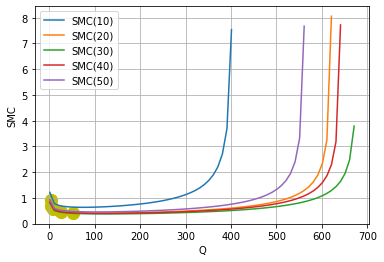

In [389]:
for i in range(10,60,10):
    ggg1=np.arange(1,int(-(opt.minimize(negativize(lambda_sy_x2_fixed_x1(ygood1,i)),0)).fun),10)#шаг лучше ставить 10, иначе долго
    ggg2=SMC_fixed_x1(ygood1,i)(ggg1)
    plt.plot(ggg1,ggg2,label=f'SMC({i})')
    plt.scatter(opt.minimize(SMC_fixed_x1(ygood1,i),1).x,opt.minimize(SMC_fixed_x1(ygood1,i),1).fun,c='y',s=150,marker="o")
plt.legend()
plt.grid()
plt.xlabel('Q')
plt.ylabel('SMC')

## ***Получение SATC***

________

In [390]:
def atc_universal(gr):
    atcuni=lambda par1,par2: lambda_tc(par1,par2)/lambda_y(gr)(par1,par2)
    return atcuni

In [391]:
def ALPHA_satc_x2_fixed_x1(gr,fixed_x1):
    alphsatcx2=lambda par: atc_universal(gr)(fixed_x1,par)
    return alphsatcx2

In [392]:
def ALPHA_satc_x2_fixed_x2(gr,fixed_x2):
    alphsatcx1=lambda par: atc_universal(gr)(par,fixed_x2)
    return alphsatcx1

(0.0, 2.5)

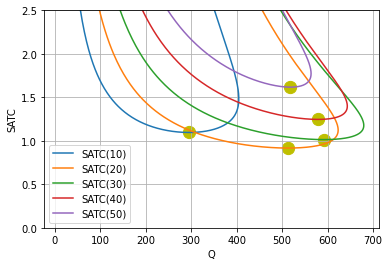

In [405]:
ggg1=np.arange(1,100,0.1)
for i in range(10,60,10):
    ggg2=ALPHA_satc_x2_fixed_x1(ygood1,i)(ggg1)
    ggg3=lambda_sy_x2_fixed_x1(ygood1,i)(ggg1)

    plt.plot(ggg3,ggg2,label=f"SATC({i})")
    plt.scatter(lambda_sy_x2_fixed_x1(ygood1,i)(opt.minimize(ALPHA_satc_x2_fixed_x1(ygood1,i),1).x),
                opt.minimize(ALPHA_satc_x2_fixed_x1(ygood1,i),1).fun,c='y',s=150,marker="o")
plt.grid()
plt.legend()
plt.xlabel('Q')
plt.ylabel('SATC')
plt.ylim(0,2.5)

## ***Объединение графиков SMC и SATC***

__________________

(0.0, 2.5)

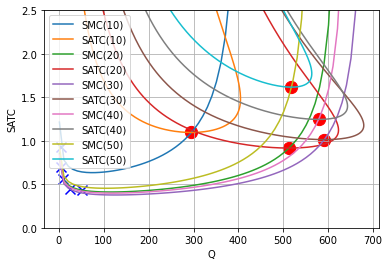

In [407]:
ggg1=np.arange(1,100,0.1)
for i in range(10,60,10):
    ggg2=ALPHA_satc_x2_fixed_x1(ygood1,i)(ggg1)
    ggg3=lambda_sy_x2_fixed_x1(ygood1,i)(ggg1)
    
    mmm1=np.arange(1,int(-(opt.minimize(negativize(lambda_sy_x2_fixed_x1(ygood1,i)),0)).fun),10)#шаг лучше ставить 10, иначе долго
    mmm2=SMC_fixed_x1(ygood1,i)(mmm1)
    plt.plot(mmm1,mmm2,label=f'SMC({i})')
    plt.scatter(opt.minimize(SMC_fixed_x1(ygood1,i),1).x,opt.minimize(SMC_fixed_x1(ygood1,i),1).fun,c='b',s=100,marker="x")
    
    
    plt.plot(ggg3,ggg2,label=f"SATC({i})")
    plt.scatter(lambda_sy_x2_fixed_x1(ygood1,i)(opt.minimize(ALPHA_satc_x2_fixed_x1(ygood1,i),1).x),
                opt.minimize(ALPHA_satc_x2_fixed_x1(ygood1,i),1).fun,c='r',s=150,marker="o")
plt.grid()
plt.legend()
plt.xlabel('Q')
plt.ylabel('SATC')
plt.ylim(0,2.5)

# УСТАРЕВШЕЕ

## Получение STC (Краткосрочные издекжки)
(УСТАРЕВШАЯ ВЕРСИЯ)

Text(0.5, 1.0, 'Полные издержки при переменном x1')

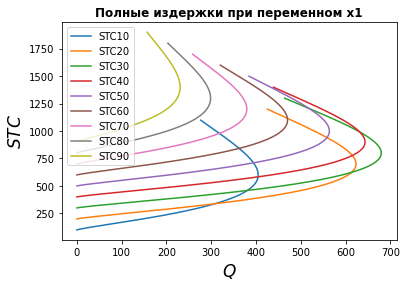

In [618]:
hhx2=np.arange(0,100,0.1)
for i in range(10,100,10):
    hhx1=lambda_tc(i,hhx2)
    hhq=lambda_y(ygood1)(i,hhx2)
    plt.plot(hhq,hhx1,label=f'STC{i}')

plt.legend()
plt.xlabel(r'$Q$',fontsize=17, fontweight='bold')
plt.ylabel(r'$STC$',fontsize=17, fontweight='bold')
plt.title('Полные издержки при переменном x1', fontweight='bold')

<string>:2: RuntimeWarning: invalid value encountered in power
<string>:2: RuntimeWarning: invalid value encountered in power
<string>:2: RuntimeWarning: invalid value encountered in power
<string>:2: RuntimeWarning: invalid value encountered in power
<string>:2: RuntimeWarning: invalid value encountered in power
<string>:2: RuntimeWarning: invalid value encountered in power
<string>:2: RuntimeWarning: invalid value encountered in power
<string>:2: RuntimeWarning: invalid value encountered in power
<string>:2: RuntimeWarning: invalid value encountered in power


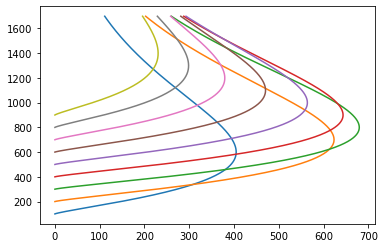

In [898]:
ggg1=np.arange(1,1700,1)
for i in range(10,100,10):
    ggg2=lambda_sy_x2_stc_fixed_x1(ygood1,i)(ggg1)
    plt.plot(ggg2,ggg1)

In [904]:
lambda_sy_x2_stc_fixed_x1(ygood1,10)(200)

147.06928460315498

Text(0.5, 1.0, 'Полные издержки при переменном x2')

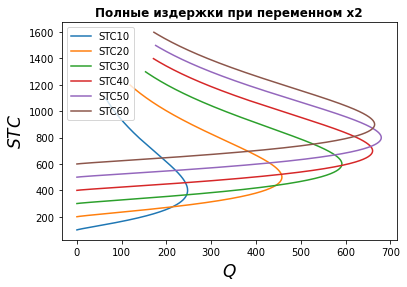

In [619]:
hhx1=np.arange(0,100,0.1)
for i in range(10,70,10):
    hhx2=lambda_tc(hhx1,i)
    hhq=lambda_y(ygood1)(hhx1,i)
    plt.plot(hhq,hhx2,label=f'STC{i}')

plt.legend()
plt.xlabel(r'$Q$',fontsize=17, fontweight='bold')
plt.ylabel(r'$STC$',fontsize=17, fontweight='bold')
plt.title('Полные издержки при переменном x2', fontweight='bold')

## Получение SATC
(УСТАРЕВШАЯ ВЕРСИЯ)

Text(0.5, 1.0, 'Cредние издержки при переменном x2')

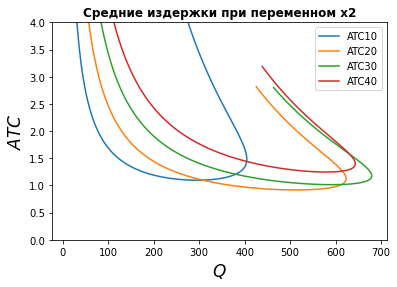

In [622]:
hhx2=np.arange(1,100,0.1)
for i in range(10,50,10):
    hhq=lambda_y(ygood1)(i,hhx2)
    hh_atc=lambda_tc(i,hhx2)/lambda_y(ygood1)(i,hhx2)
    plt.plot(hhq,hh_atc,label=f'ATC{i}')

    
plt.xlabel(r'$Q$',fontsize=17, fontweight='bold')
plt.ylabel(r'$ATC$',fontsize=17, fontweight='bold')
plt.legend()
plt.ylim(0,4)
plt.title('Cредние издержки при переменном x2',fontweight='bold')

Text(0.5, 1.0, 'Cредние издержки при переменном x1')

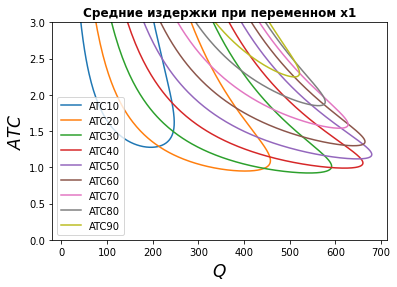

In [623]:
hhx1=np.arange(1,100,0.1)
for i in range(10,100,10):
    hhq=lambda_y(ygood1)(hhx1,i)
    hh_atc=lambda_tc(hhx1,i)/lambda_y(ygood1)(hhx1,i)
    plt.plot(hhq,hh_atc,label=f'ATC{i}')

plt.xlabel(r'$Q$',fontsize=17, fontweight='bold')
plt.ylabel(r'$ATC$',fontsize=17, fontweight='bold')
plt.legend()
plt.ylim(0,3)
plt.title('Cредние издержки при переменном x1',fontweight='bold')

## Прочее

In [ ]:
lmc2=lambda par:derivative(ftc1, par, dx=1e-6)

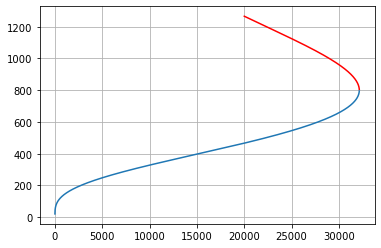

In [241]:
iii1=np.arange(1,32142,10)
iii0=np.arange(20000,32142,10)
iii2=ftc1(iii1)
iii4=ftc2(iii0)
plt.plot(iii1,iii2)
plt.plot(iii0,iii4,'r')
plt.grid()

x1**1.925*x2**1.925*exp(-0.0001*x1*x2 - 0.0591666666666667*x1 - 0.0355*x2)

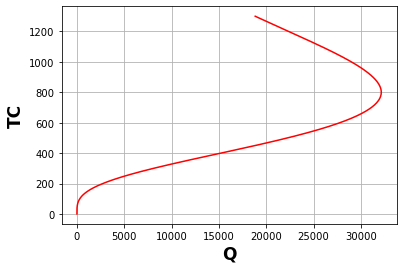

In [242]:
ltc_plot(ygood2,0)

In [244]:
ggg1=np.arange(1,32142,10)
ggg2=lmc2(ggg1)

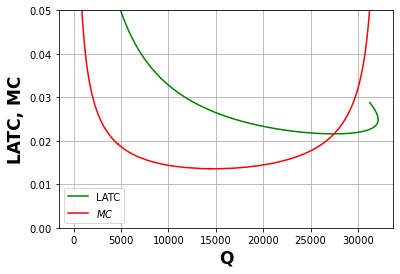

In [282]:
fig,ax=latc_plot(ygood2,0.05)

ax.plot(ggg1,ggg2,'r',label='LMC')

ax.set_xlabel('Q',fontsize=17, fontweight='bold')
ax.set_ylabel('LATC, LMC',fontsize=17, fontweight='bold')
ax.legend()
# plt.ylim(0,0.08)
# plt.grid()

In [584]:
ttt1=np.arange(50,30000,1)
ttt2=lambda_lmc2(ttt1)

plt.plot(ttt1,ttt2,'r')
plt.plot(rrr3,rrr2)
plt.ylim(0,0.08)

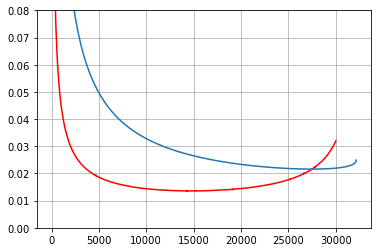

In [585]:
%matplotlib inline

plt.plot(ttt1,ttt2,'r')
plt.plot(rrr3,rrr2)
plt.ylim(0,0.08)
plt.grid()

In [586]:
yex2

x1**1.925*x2**1.925*exp(-0.0001*x1*x2 - 0.0591666666666667*x1 - 0.0355*x2)

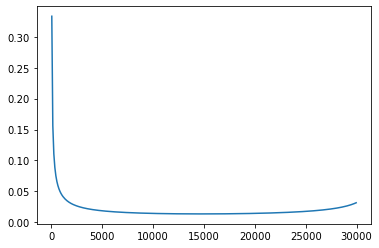

In [577]:
plt.plot(ttt1,ttt2)
plt.plot(ttt1,ttt2,'r')

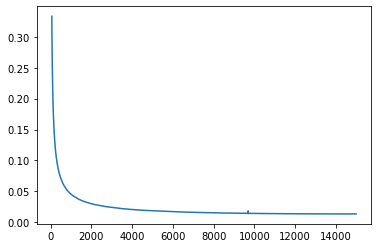

In [524]:
plt.plot(rrr1,rrr2)

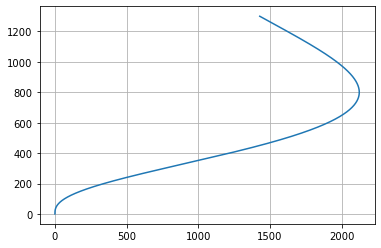

In [138]:
xxx1=np.arange(0.1,1300,0.01)
xxx2=lambda_yex2_tc(xxx1)
plt.plot(xxx2,xxx1)
# plt.plot(yyy2,yyy1,'r--')
plt.grid()
# plt.xtitle('Q')

## МУСОР

In [224]:
#табулирование средних издержек
latctable=[ltctable[i]/qtable[i] for i in range(len(ltctable))]

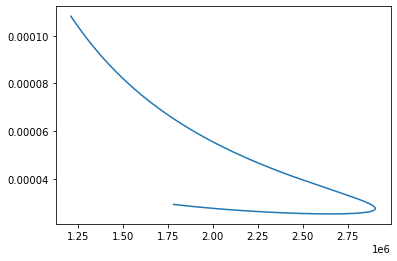

In [225]:
#==чем же можно объяснить такой график?
plt.plot(qtable[3000:],latctable[3000:])

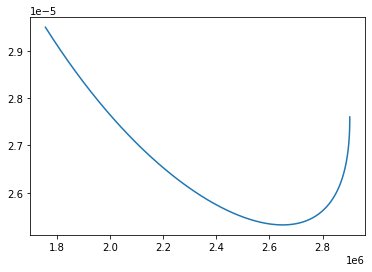

In [198]:
plt.plot(qtable[3000:5000],latctable[3000:5000])

In [159]:
lambda_q(4,4)

142.1619106145962

In [179]:
atctable1=[tctable1[i]/qtable1[i] for i in range(len(tctable))]

In [185]:
len(tctable)

9990

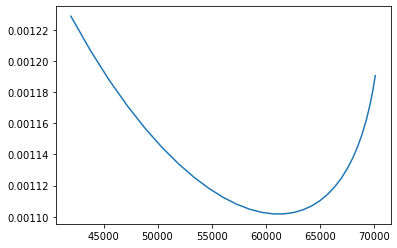

In [142]:
plt.plot(qtable1[30:],atctable1[30:])

In [159]:
yex3=ycheck_all(30,60,20,30,-0.0005)
yex3

x1**2.1*x2**1.7*exp(-0.0005*x1*x2 - 0.04*x1 - 0.0133333333333333*x2)

In [192]:
def atc_table_gen(gr,subx1):
    vr_qtable=qlambd(subx1,xxx2)
    vr_tctable=[subx1+xxx2[i] for i in range(len(xxx2))]
    vr_atctable=[vr_tctable[i]/vr_qtable[i] for i in range(len(vr_tctable))]
    return [vr_qtable,vr_atctable]

In [225]:
xxx2=np.arange(0.1,100,0.01)

(10000.0, 30000.0)

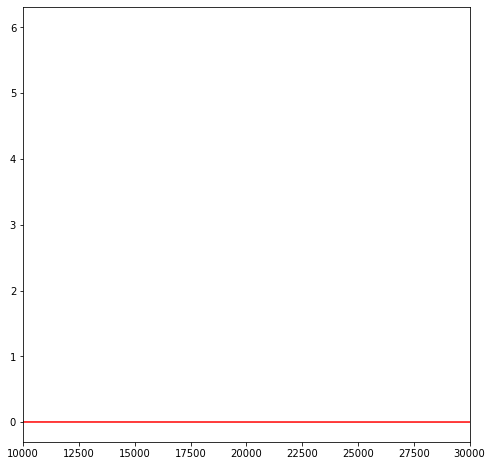

In [232]:
fig, ax = plt.subplots(figsize=(8,8))
# plt.plot(qtable,atctable)
ax.plot(atc_table_gen(yex3,10)[0],atc_table_gen(yex3,10)[1],c='r')
# ax.plot(atc_table_gen(yex3,20)[0],atc_table_gen(yex3,20)[1],c='r')
# ax.plot(atc_table_gen(yex3,30)[0],atc_table_gen(yex3,30)[1],c='r')
# ax.plot(atc_table_gen(yex3,40)[0],atc_table_gen(yex3,40)[1],c='r')
# ax.plot(atc_table_gen(yex3,50)[0],atc_table_gen(yex3,50)[1],c='r')

ax.set_xlim(10000,30000)

In [128]:
qtable20=qlambd(20,xxx2)

In [129]:
tctable20=[20+xxx2[i] for i in range(len(xxx2))]

In [131]:
atctable20=[tctable20[i]/qtable20[i] for i in range(len(tctable20))]

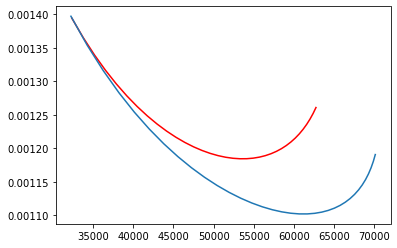

In [151]:
plt.plot(qtable20[25:],atctable20[25:],c='r')
plt.plot(qtable[25:],atctable[25:])

In [ ]:
#===
def LMC(gr):
    ftc1=inversefunc(get_lambda(gr,'q(tc)'),domain=[0, 800],open_domain=[True, False])
# ftc2=inversefunc(get_lambda(gr,'q(tc)'),domain=[800.001, 1300],open_domain=[False,False])
# lambda_lmc1=lambda per:derivative(lambda_tc_yex2, per, dx=1e-6)
    lmc2=lambda par:derivative(ftc1, par, dx=1e-6)
    return lmc2